In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
studentsProfiles_df=pd.read_csv('studentData.csv')

In [67]:
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,male,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,female,married,\r\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,male,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,male,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,female,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [68]:
studentsProfiles_df['gender'] = studentsProfiles_df['gender'].map({'male': 1, 'female': 0})
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,married,\r\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [69]:
studentsProfiles_df['parentsStatus'] = studentsProfiles_df['parentsStatus'].replace({'motherless':'singleParent','fatherless':'singleParent'})

In [70]:
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,married,\r\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [71]:
studentsProfiles_df['parentsStatus'] = studentsProfiles_df['parentsStatus'].map({'singleParent': 1, 'married': 0,'seperated':2,'adopted':3})
studentsProfiles_df.drop(['Hobby','idol','likesStudying','helpsWith','activityTaken','activityWithFamily'], axis = 1,inplace=True)

In [72]:
studentsProfiles_df.head()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,2,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,2,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [73]:
studentsProfiles_df.drop(studentsProfiles_df.tail(10).index,inplace=True)

In [74]:
studentsProfiles_df['MT'] = studentsProfiles_df['MT'] * 100
studentsProfiles_df['A'] = studentsProfiles_df['A'] * 100
studentsProfiles_df['V'] = studentsProfiles_df['V'] * 100
studentsProfiles_df.head()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,30.0,17.0,13.0
1,2,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,31.0,29.0,16.0
2,3,1,2,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,22.0,17.0,30.0
3,4,1,2,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,16.0,29.0,15.0
4,5,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,27.0,12.0,30.0


# MT - movment and touch

In [75]:
studentsProfiles_MT_df = studentsProfiles_df.drop(['A','V'],axis =1)

In [76]:
MT_X = studentsProfiles_MT_df.drop('MT',axis =1)
MT_Y = studentsProfiles_MT_df['MT']
MT_X_train, MT_X_test, MT_Y_train, MT_Y_test = train_test_split(MT_X,MT_Y,test_size = 0.2)

In [77]:
studentsProfiles_MT_df.describe()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,helpsAtHome,isActiveWithFamily,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,0.525000,0.87500,0.025000,0.075000,0.025000,0.075000,0.025000,0.050000,0.100000,...,0.775000,0.775000,0.650000,0.800000,0.075000,0.225000,0.050000,0.125000,0.050000,22.250000
std,11.690452,0.505736,0.96576,0.158114,0.266747,0.158114,0.266747,0.158114,0.220721,0.303822,...,0.422902,0.422902,0.483046,0.405096,0.266747,0.422902,0.220721,0.334932,0.220721,7.203098
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,10.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
50%,20.500000,1.000000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
75%,30.250000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.250000
max,40.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000


In [78]:
clf = tree.DecisionTreeRegressor()
clf.min_samples_leaf = 4
clf.max_depth = 5
clf.min_samples_split=6
clf = clf.fit(MT_X_train,MT_Y_train)

In [79]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [80]:
clf.min_samples_leaf = 4
clf.max_depth = 5
clf.min_samples_split=6

In [81]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [82]:
MT_predictions = clf.predict(MT_X_test)
MT_predictions

array([14.6       , 16.        , 24.28571429, 23.25      , 24.28571429,
       23.25      , 14.6       , 27.25      ])

In [83]:
rmse = np.sqrt(mean_squared_error(MT_Y_test,MT_predictions))
r2 = r2_score(MT_Y_test,MT_predictions)

n = MT_predictions.shape[0]
k = MT_X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

9.277079432996272 -0.811877953813104 1.3427877209916683


[Text(0.5, 0.9, 'x[1] <= 0.5\nsquared_error = 51.34\nsamples = 32\nvalue = 22.188'),
 Text(0.2, 0.7, 'x[38] <= 0.5\nsquared_error = 36.402\nsamples = 16\nvalue = 25.188'),
 Text(0.1, 0.5, 'squared_error = 3.188\nsamples = 4\nvalue = 28.75'),
 Text(0.3, 0.5, 'x[0] <= 15.5\nsquared_error = 41.833\nsamples = 12\nvalue = 24.0'),
 Text(0.2, 0.3, 'squared_error = 60.25\nsamples = 4\nvalue = 21.5'),
 Text(0.4, 0.3, 'x[34] <= 0.5\nsquared_error = 27.938\nsamples = 8\nvalue = 25.25'),
 Text(0.3, 0.1, 'squared_error = 33.688\nsamples = 4\nvalue = 23.25'),
 Text(0.5, 0.1, 'squared_error = 14.188\nsamples = 4\nvalue = 27.25'),
 Text(0.8, 0.7, 'x[0] <= 25.5\nsquared_error = 48.277\nsamples = 16\nvalue = 19.188'),
 Text(0.7, 0.5, 'x[40] <= 0.5\nsquared_error = 42.744\nsamples = 11\nvalue = 21.273'),
 Text(0.6, 0.3, 'squared_error = 37.918\nsamples = 7\nvalue = 24.286'),
 Text(0.8, 0.3, 'squared_error = 7.5\nsamples = 4\nvalue = 16.0'),
 Text(0.9, 0.5, 'squared_error = 29.84\nsamples = 5\nvalue = 14.

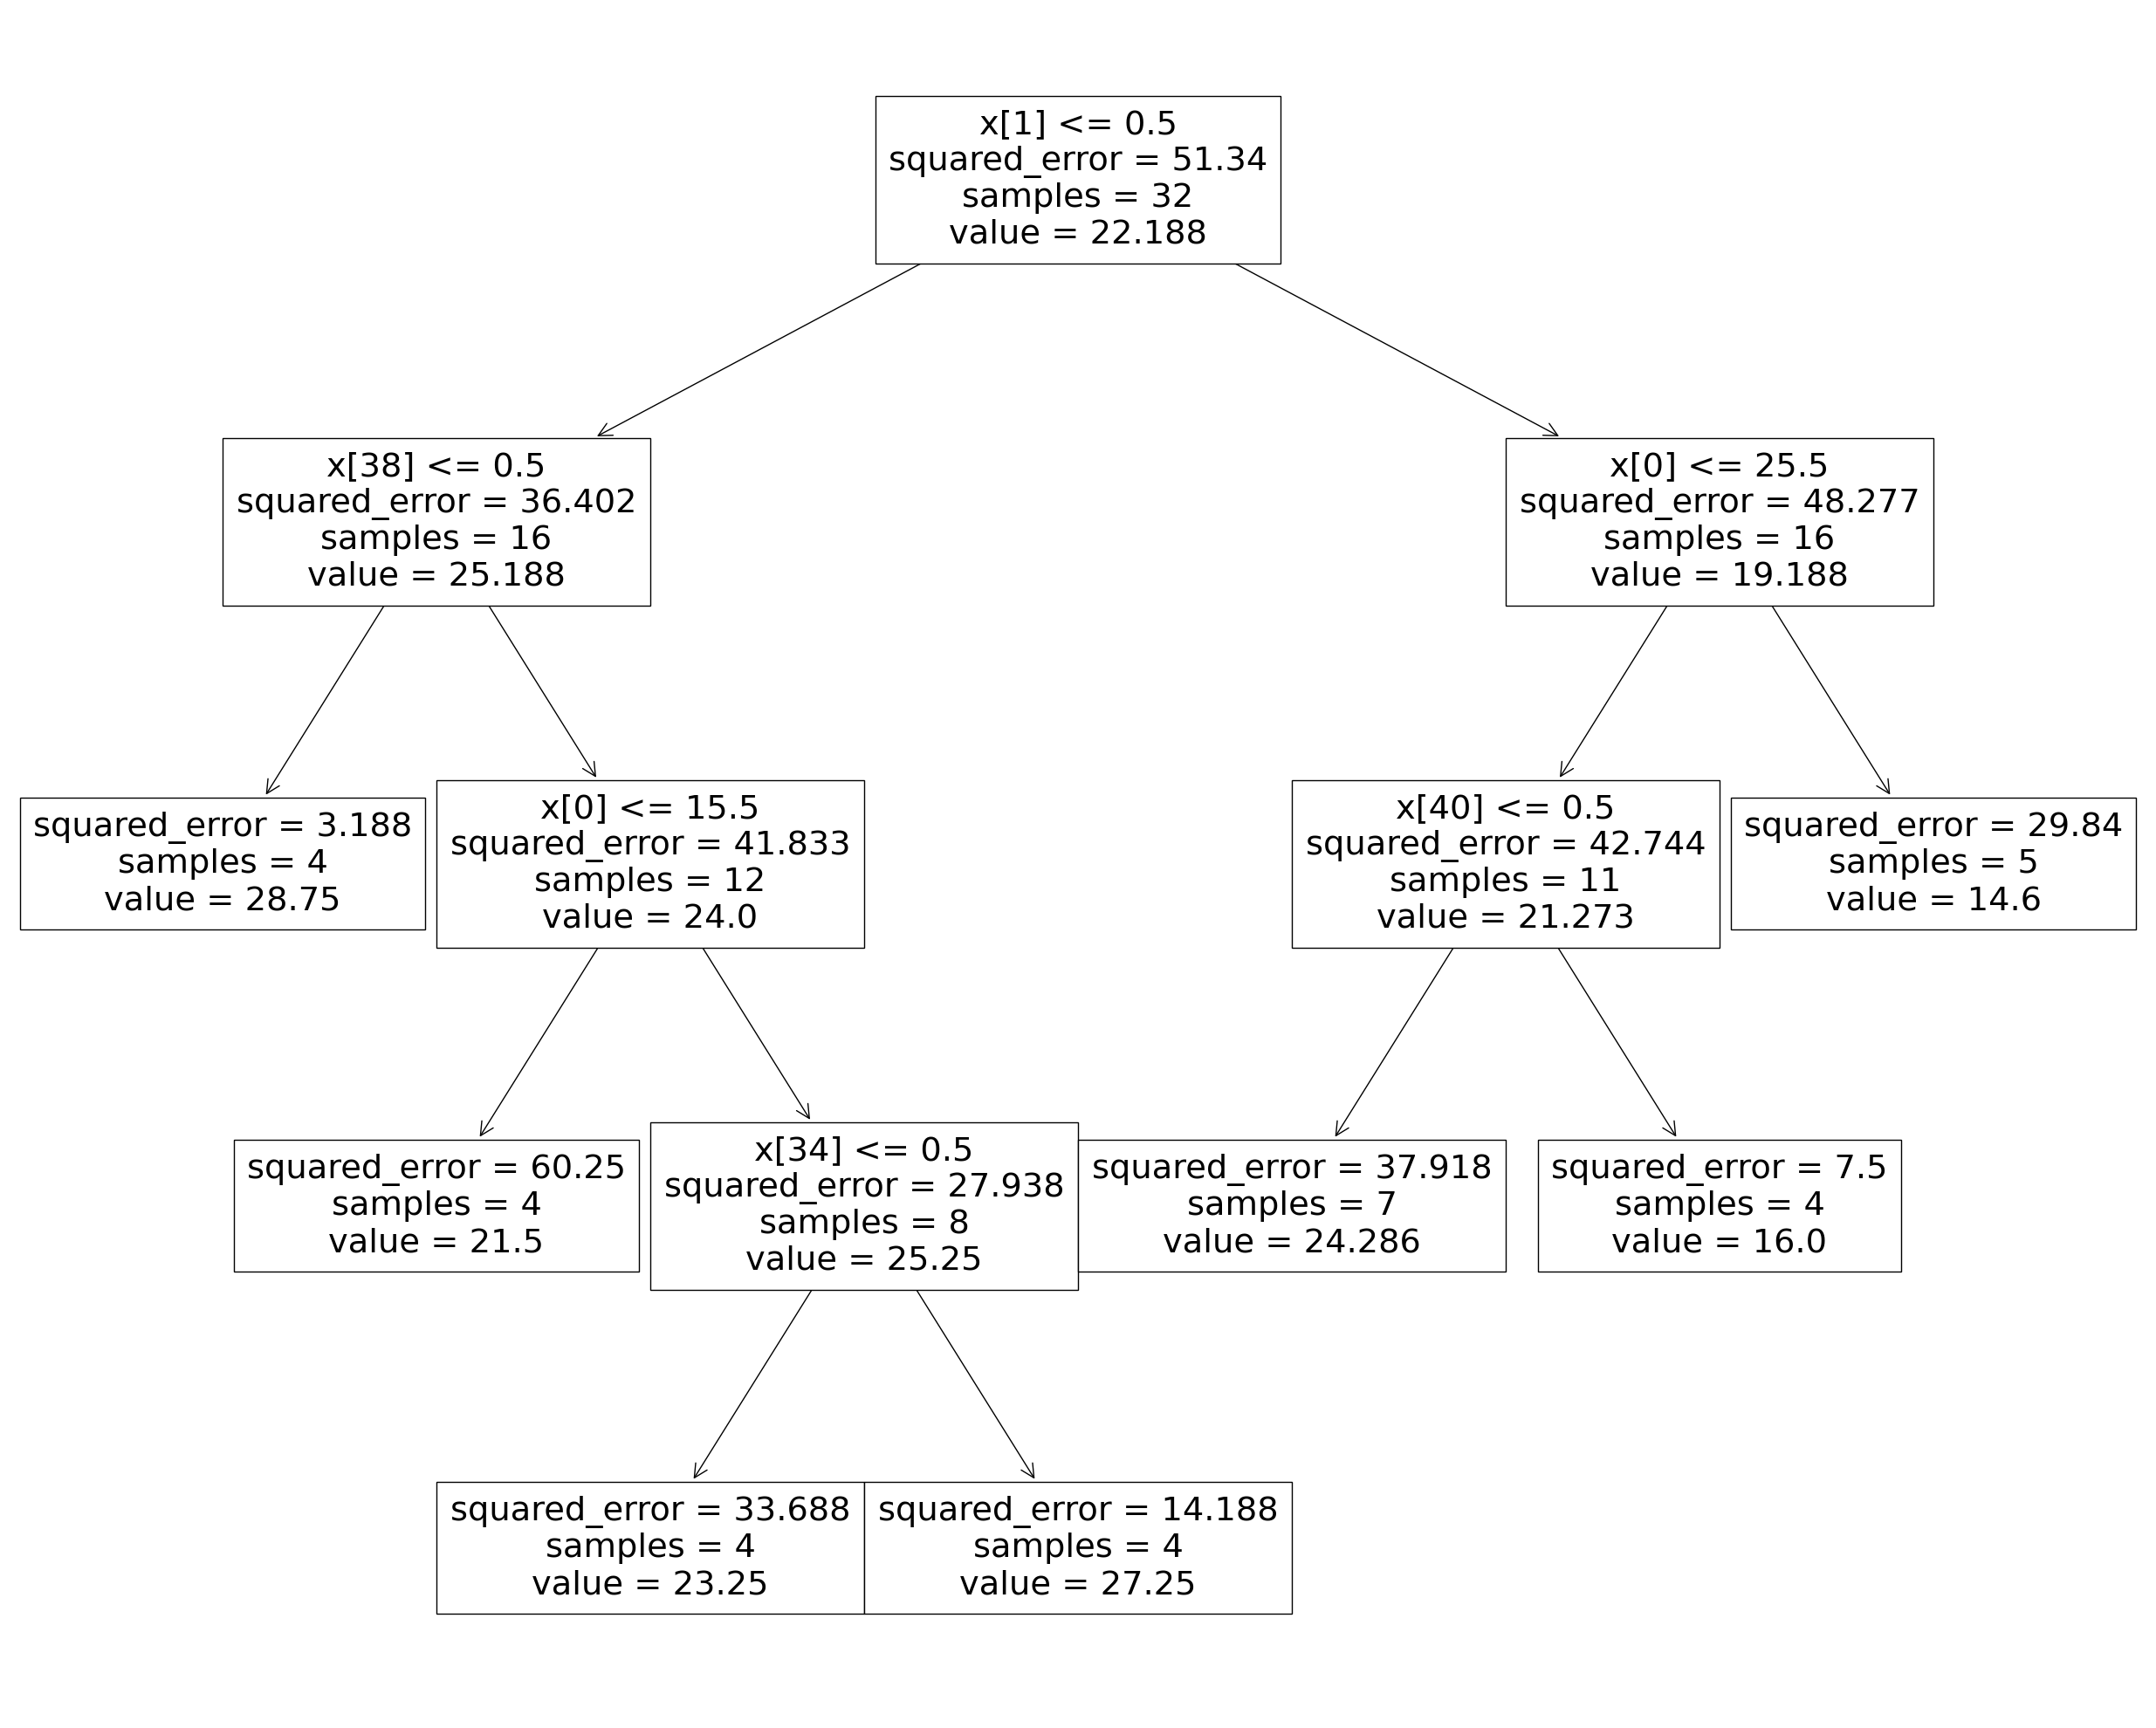

In [84]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
              

In [104]:
np_MT_predictions = np.array(MT_predictions)
np_MT_Y_test = np.array(MT_Y_test)
np_diff = np_MT_predictions - np_MT_Y_test
print(np_diff)

[ -8.4        -16.           7.28571429  10.25         9.28571429
  -8.75        -6.4          0.25      ]


<Figure size 900x1200 with 0 Axes>

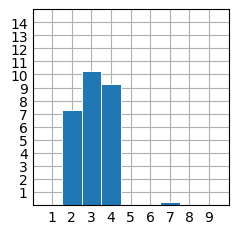

In [120]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(9,12))
x = np.arange(0, 8, 1)

y = np_diff

fig, ax = plt.subplots()



ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
       ylim=(0, 15), yticks=np.arange(1, 15))

plt.show()

# A - audio

In [86]:
studentsProfiles_A_df = studentsProfiles_df.drop(['MT','V'],axis =1)

In [87]:
A_X = studentsProfiles_A_df.drop('A',axis =1)
A_Y = studentsProfiles_A_df['A']
A_X_train, A_X_test, A_Y_train, A_Y_test = train_test_split(A_X,A_Y,test_size = 0.2)

In [88]:
clf = clf.fit(A_X_train,A_Y_train)

In [89]:
A_predictions = clf.predict(A_X_test)
A_predictions

array([14.  , 29.2 , 29.2 , 15.75, 14.  , 23.5 , 15.75, 23.5 ])

In [90]:
n = A_predictions.shape[0]
k = A_X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

9.277079432996272 -0.811877953813104 1.3427877209916683


[Text(0.5, 0.9166666666666666, 'x[0] <= 26.5\nsquared_error = 54.335\nsamples = 32\nvalue = 22.094'),
 Text(0.25, 0.75, 'x[36] <= 0.5\nsquared_error = 44.043\nsamples = 22\nvalue = 24.045'),
 Text(0.125, 0.5833333333333334, 'squared_error = 1.76\nsamples = 5\nvalue = 29.2'),
 Text(0.375, 0.5833333333333334, 'x[38] <= 0.5\nsquared_error = 46.367\nsamples = 17\nvalue = 22.529'),
 Text(0.25, 0.4166666666666667, 'squared_error = 16.25\nsamples = 4\nvalue = 27.5'),
 Text(0.5, 0.4166666666666667, 'x[2] <= 1.5\nsquared_error = 45.692\nsamples = 13\nvalue = 21.0'),
 Text(0.375, 0.25, 'x[0] <= 12.0\nsquared_error = 34.438\nsamples = 8\nvalue = 18.25'),
 Text(0.25, 0.08333333333333333, 'squared_error = 44.688\nsamples = 4\nvalue = 20.75'),
 Text(0.5, 0.08333333333333333, 'squared_error = 11.688\nsamples = 4\nvalue = 15.75'),
 Text(0.625, 0.25, 'squared_error = 32.24\nsamples = 5\nvalue = 25.4'),
 Text(0.75, 0.75, 'x[1] <= 0.5\nsquared_error = 50.16\nsamples = 10\nvalue = 17.8'),
 Text(0.625, 0.5

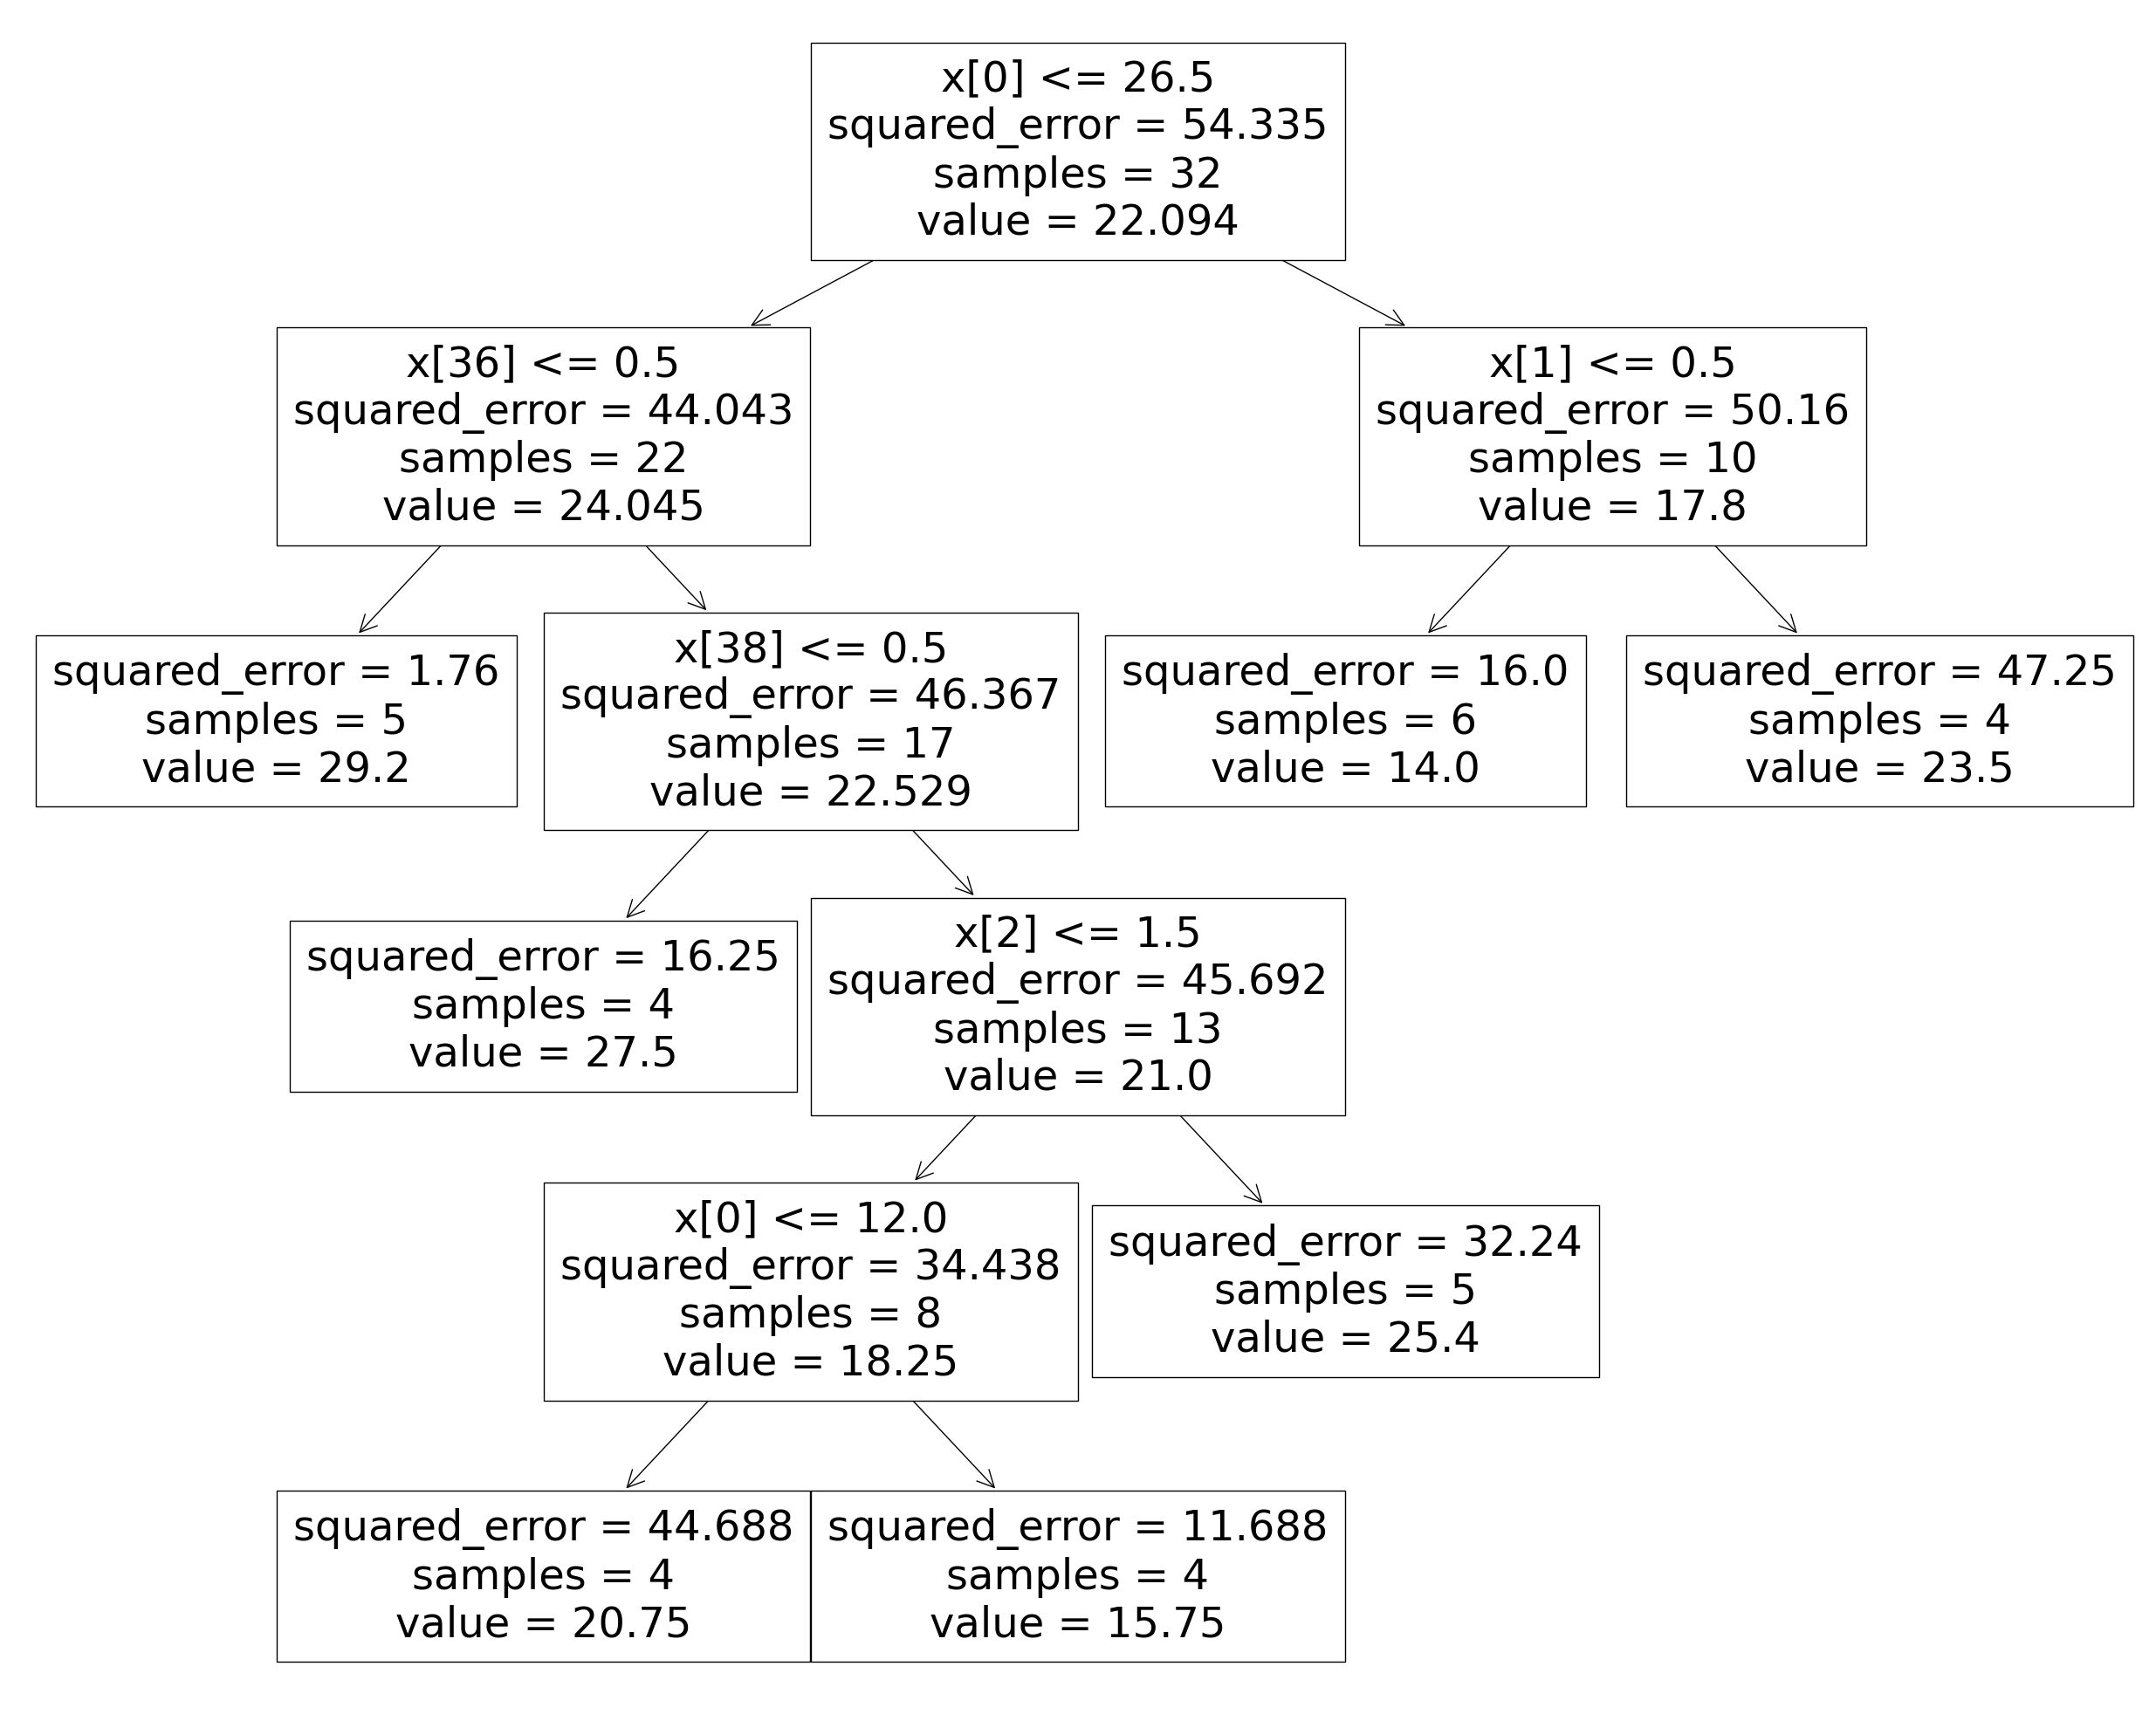

In [91]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

# V - vision

In [92]:
studentsProfiles_V_df = studentsProfiles_df.drop(['MT','A'],axis =1)

In [93]:
V_X = studentsProfiles_V_df.drop('V',axis =1)
V_Y = studentsProfiles_V_df['V']
V_X_train, V_X_test, V_Y_train, V_Y_test = train_test_split(V_X,V_Y,test_size = 0.2)

In [94]:
clf = clf.fit(V_X_train,V_Y_train)

In [95]:
V_predictions = clf.predict(V_X_test)
V_predictions

array([20.        , 20.        , 21.        , 16.85714286, 25.33333333,
       28.5       , 21.        , 25.33333333])

In [96]:
n = V_predictions.shape[0]
k = V_X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

9.277079432996272 -0.811877953813104 1.3427877209916683


[Text(0.375, 0.9, 'x[31] <= 0.5\nsquared_error = 49.621\nsamples = 32\nvalue = 21.938'),
 Text(0.25, 0.7, 'squared_error = 50.222\nsamples = 6\nvalue = 25.333'),
 Text(0.5, 0.7, 'x[30] <= 0.5\nsquared_error = 46.207\nsamples = 26\nvalue = 21.154'),
 Text(0.25, 0.5, 'x[2] <= 1.5\nsquared_error = 36.364\nsamples = 11\nvalue = 19.0'),
 Text(0.125, 0.3, 'squared_error = 19.551\nsamples = 7\nvalue = 16.857'),
 Text(0.375, 0.3, 'squared_error = 43.688\nsamples = 4\nvalue = 22.75'),
 Text(0.75, 0.5, 'x[32] <= 0.5\nsquared_error = 47.529\nsamples = 15\nvalue = 22.733'),
 Text(0.625, 0.3, 'x[0] <= 23.5\nsquared_error = 33.107\nsamples = 11\nvalue = 23.727'),
 Text(0.5, 0.1, 'squared_error = 25.143\nsamples = 7\nvalue = 21.0'),
 Text(0.75, 0.1, 'squared_error = 11.25\nsamples = 4\nvalue = 28.5'),
 Text(0.875, 0.3, 'squared_error = 77.0\nsamples = 4\nvalue = 20.0')]

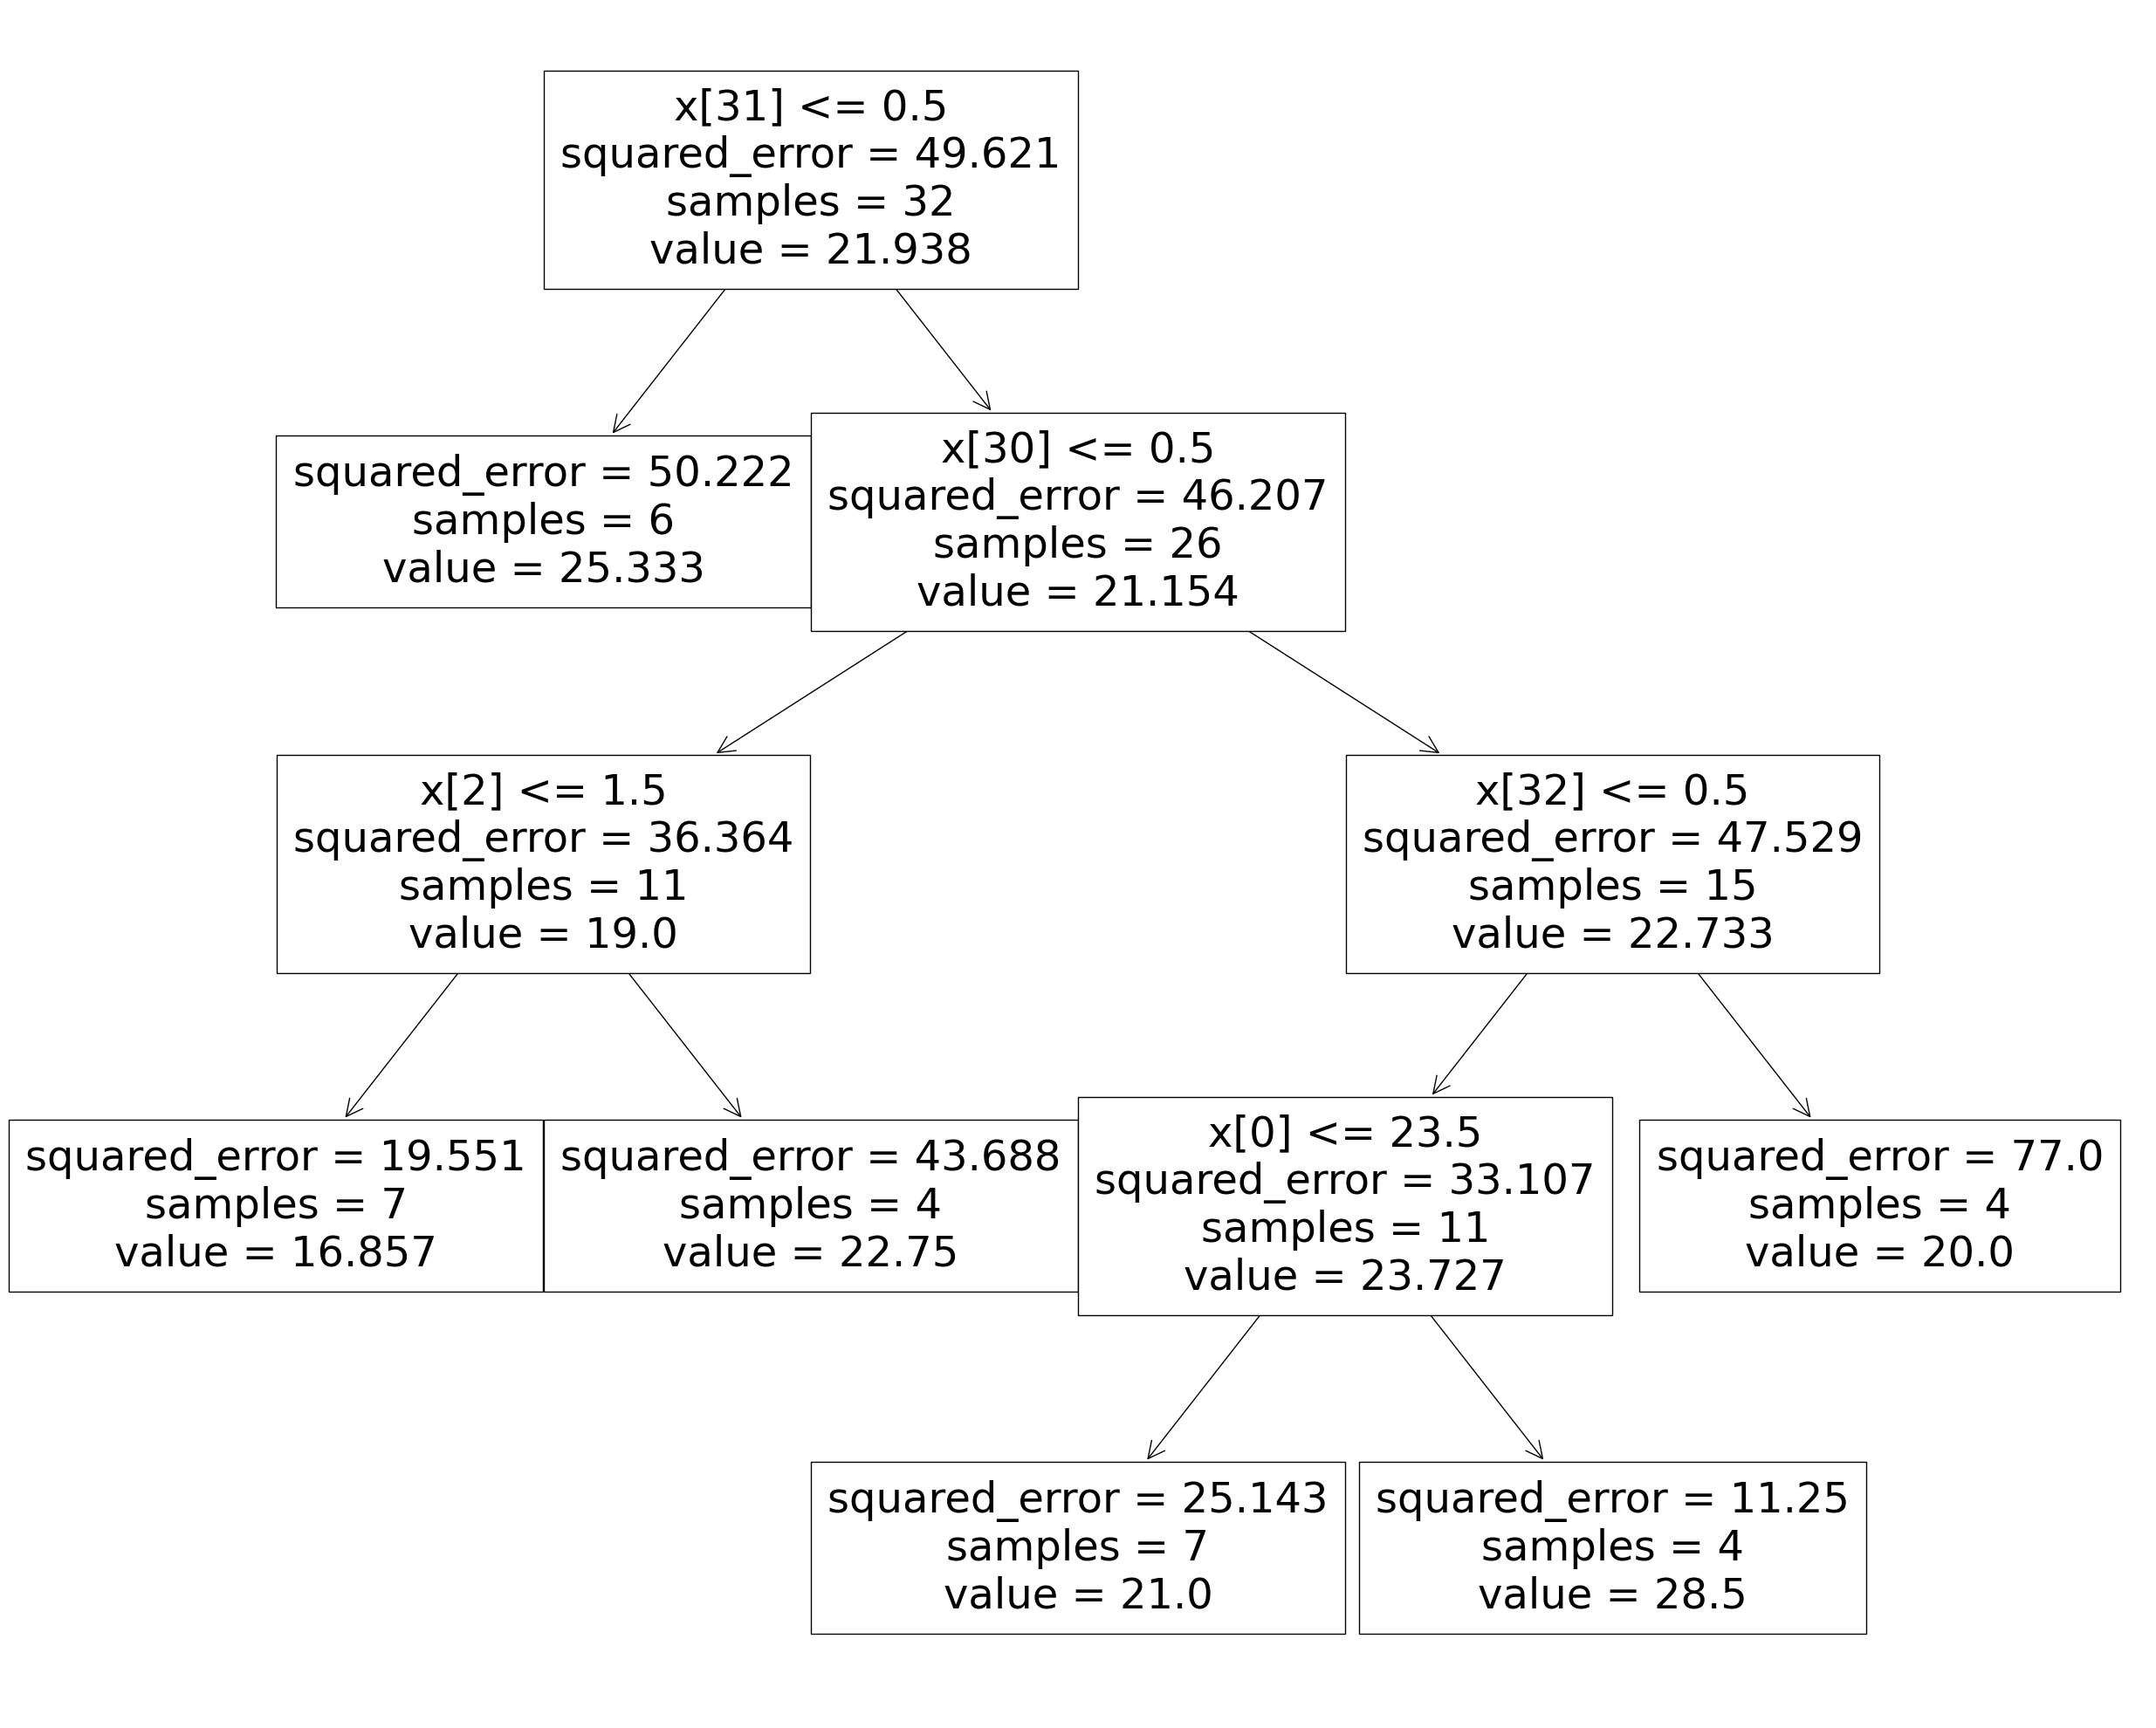

In [97]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)